# 项目：调查数据集（未前往就诊的挂号预约）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [1]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。

使用head()功能查看數據內容，檢查標題與內容分隔是否正確

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


使用info()功能，檢查數據是否有缺失值

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


由上述兩個函式的結果來看，欄位與數據內容沒有擠在同一欄有分隔，且各欄的數據並無缺失值。

> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（未前往就诊的挂号预约）

In [5]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。


**datetime型: **由於'ScheduledDay'和'AppointmentDay'不是datetime型，可以使用pandas的to_datetime()函式將字符改為datetime型，以方便後續分析

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

現在，可以看到'ScheduledDay'和'AppointmentDay'已是datetime型了。

**重命名列:**重命名所有列標籤，將 '-' 替換為 '_' ，並將所有內容轉換為小寫


In [8]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [9]:
#檢視目前所有列標籤
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

確認所有列標籤都改為小寫與下划線

In [10]:
# 瞭解數據集的日期
df['scheduledday'].value_counts().sort_index()

2015-11-10 07:13:56+00:00    1
2015-12-03 08:17:28+00:00    1
2015-12-07 10:40:59+00:00    1
2015-12-07 10:42:42+00:00    1
2015-12-07 10:43:01+00:00    1
                            ..
2016-06-08 19:32:25+00:00    1
2016-06-08 19:32:56+00:00    1
2016-06-08 19:33:23+00:00    1
2016-06-08 19:58:52+00:00    1
2016-06-08 20:07:23+00:00    1
Name: scheduledday, Length: 103549, dtype: int64

**轉換列值: **為了方便數據分析，將no_show的string型轉換成int型，新增noshow欄位以紀錄這項數據。

no_show = No 轉換成 noshow = 0，表示病人已依約就診。

no_show = Yes 轉換成 noshow = 1，表示病人未前往就診。

In [11]:
#複製兩個數據集
df_no = df.copy()
df_yes = df.copy()

In [12]:
#df_no數據集保留no_show = No
#df_yes數據集保留no_show = Yes
df_no = df_no[df_no.no_show == 'No']
df_yes = df_yes[df_yes.no_show == 'Yes']

In [13]:
#確認no_show的唯一值為No
df_no['no_show'].unique()

array(['No'], dtype=object)

In [14]:
#確認no_show的唯一值為Yes
df_yes['no_show'].unique()

array(['Yes'], dtype=object)

In [15]:
#查看数据集维度
df_no.shape

(88208, 14)

In [16]:
#查看数据集维度
df_yes.shape

(22319, 14)

In [17]:
#為no_show = No的數據集創建數字组0
noshow_no = np.repeat('0', 88208)
noshow_no

array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U1')

In [18]:
#為no_show = Yes的數據集創建數字组1
noshow_yes = np.repeat('1', 22319)
noshow_yes

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U1')

將名為noshow的新列新增到數據組，並丟棄原本no_show列。

In [19]:
#將noshow = 0新增到數據集df_no
df_no.loc[:,'noshow'] = noshow_no
#將原本no_show列丟棄
df_no.drop(['no_show'], axis=1, inplace=True)
df_no.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,noshow
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,0


In [20]:
#將noshow = 1新增到數據集df_yes
df_yes.loc[:,'noshow'] = noshow_yes
#將原本no_show列丟棄
df_yes.drop(['no_show'], axis=1, inplace=True)
df_yes.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,noshow
110484,5.133650e+14,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,1
110492,6.456342e+14,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1
110496,8.544295e+13,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,1
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,1
110516,6.923772e+13,5780205,F,2016-06-07 07:45:16+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,0,0,0,0,0,1


In [21]:
#合併兩個數據集
new_df = df_no.append(df_yes, ignore_index=True)
new_df['noshow'] = pd.to_numeric(new_df['noshow'], downcast = 'integer')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  noshow        

確認已合併兩個數據集，且新增列標籤noshow,並丟棄no_show

<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1（探討是否有巴西福利项目與是否有就診的比例！）

In [22]:
#獲取是否有巴西福利项目和是否就診的數量
scholarship_counts = new_df.groupby(['scholarship','noshow']).count()['patientid']
scholarship_counts

scholarship  noshow
0            0         79925
             1         19741
1            0          8283
             1          2578
Name: patientid, dtype: int64

In [23]:
#獲取是否有巴西福利项目的總數
scholarship_totals = new_df.groupby('scholarship').count()['patientid']
scholarship_totals

scholarship
0    99666
1    10861
Name: patientid, dtype: int64

In [24]:
#將沒有巴西福利项目的數量除以沒有巴西福利项目的總數，以獲取是否就診的比例
no_schr_proportions = scholarship_counts[0] / scholarship_totals[0]
no_schr_proportions

noshow
0    0.801928
1    0.198072
Name: patientid, dtype: float64

In [25]:
#將有巴西福利项目的數量除以有巴西福利项目的總數，以獲取是否就診的比例
yes_schr_proportions = scholarship_counts[1] / scholarship_totals[1]
yes_schr_proportions

noshow
0    0.762637
1    0.237363
Name: patientid, dtype: float64

**在柱狀圖上繪製比例**

設置兩個項目的 x 座標位置和每個條柱的寬度。

In [26]:
ind = np.arange(len(no_schr_proportions))  # 組的 x 座標位置
width = 0.35       # 條柱的寬度

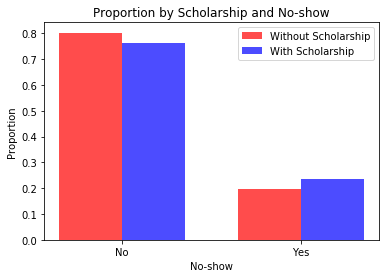

In [27]:
# 繪製條柱
no_bar = plt.bar(ind, no_schr_proportions, width, color='r', alpha=.7, label='Without Scholarship')
yes_bar = plt.bar(ind + width, yes_schr_proportions, width, color='b', alpha=.7, label='With Scholarship')

# 標題與標籤
plt.ylabel('Proportion')
plt.xlabel('No-show')
plt.title('Proportion by Scholarship and No-show')
locations = ind + width / 2  # x 座標刻度位置
labels = ['No', 'Yes']  # x 座標刻度標籤
plt.xticks(locations, labels)

# 圖例
plt.legend()

**結論**

1.在有就診的情況下，沒有福利項目的比例高於有福利項目。

2.在沒有就診的情況下，有福利項目的比例高於沒有福利項目。

### 研究问题 2（探討性別與是否有就診的比例！）

In [28]:
#獲取性別與是否就診的數量
gender_counts = new_df.groupby(['gender','noshow']).count()['patientid']
gender_counts

gender  noshow
F       0         57246
        1         14594
M       0         30962
        1          7725
Name: patientid, dtype: int64

In [29]:
#獲取性別與是否就診的總數
gender_totals = new_df.groupby('gender').count()['patientid']
gender_totals

gender
F    71840
M    38687
Name: patientid, dtype: int64

In [30]:
#將女性的數量除以女性的總數，以獲取是否就診的比例
f_proportions = gender_counts['F'] / gender_totals['F']
f_proportions

noshow
0    0.796854
1    0.203146
Name: patientid, dtype: float64

In [31]:
#將男性的數量除以男性的總數，以獲取是否就診的比例
m_proportions = gender_counts['M'] / gender_totals['M']
m_proportions

noshow
0    0.800321
1    0.199679
Name: patientid, dtype: float64

In [32]:
ind = np.arange(len(f_proportions))  # 組的 x 座標位置
width = 0.3       # 條柱的寬度

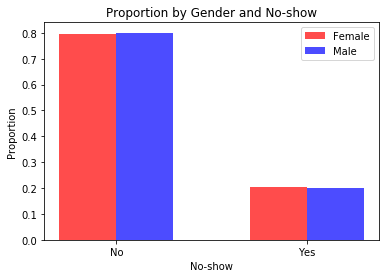

In [33]:
# 繪製條柱
f_bar = plt.bar(ind, f_proportions, width, color='r', alpha=.7, label='Female')
m_bar = plt.bar(ind + width, m_proportions, width, color='b', alpha=.7, label='Male', )

# 標題與標籤
plt.ylabel('Proportion')
plt.xlabel('No-show')
plt.title('Proportion by Gender and No-show')
locations = ind + width / 2  # x 座標刻度位置
labels = ['No', 'Yes']  # x 座標刻度標籤
plt.xticks(locations, labels)

# 圖例
plt.legend()

**結論**

可以發現性別與是否就診的情況並無太大的差異，亦即性別不影響是否就診的關係

### 研究问题 3（探討年紀越輕的人 No-show的比例更高嗎?）

In [34]:
# 先檢查每個年紀的次數
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [35]:
# 由於數據的排序是依照年紀次數降冪排序，先將資料調整為以年紀做升冪排序
## 複製一個新的數據集
age_df = new_df.copy()
## 將數據集依年紀做升冪排序
age_df.sort_values(by=['age'], inplace = True)
## 檢查每個年紀的次數
age_df['age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Name: age, Length: 104, dtype: int64

In [36]:
#發現年紀數據中有負數的，由於年紀不可能有負數，所以先過濾負數的數據
age_df = age_df[age_df.age != -1] 

In [37]:
# 再次檢查每個年紀的次數
age_df['age'].value_counts().sort_index()

0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: age, Length: 103, dtype: int64

數據集中已沒有年紀為負數的資料

In [38]:
# 刪除不需要的欄位
age_df = age_df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday', 'gender', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received'], axis = 1 );

In [39]:
# 檢視目前數據集的欄位
age_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 29623 to 60429
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   age     110526 non-null  int64
 1   noshow  110526 non-null  int8 
dtypes: int64(1), int8(1)
memory usage: 1.8 MB


In [40]:
# 獲取年紀的平均數
age_df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [41]:
# 選擇年紀小於平均值的樣本
young_age = age_df.query('age < 37.089219')
# 選擇年紀大於平均值的樣本
elder_age = age_df.query('age >= 37.089219')
# 確保查詢中的每個樣本只出現一次
num_age = age_df.shape[0]
num_age == young_age['noshow'].count() + elder_age['noshow'].count()

True

In [42]:
#年紀小於平均值的樣本，其是否就診的次數
young_counts = young_age.groupby('noshow').count()
#年紀大於平均值的樣本，其是否就診的次數
elder_counts = elder_age.groupby('noshow').count()

In [43]:
#年紀小於平均值的樣本總數
young_totals = young_age.count()
#年紀大於平均值的樣本總數
elder_totals = elder_age.count()

In [44]:
#年紀小於平均值的樣本總數，其是否就診的比例
young_proportions = young_counts['age'] / young_totals['age']
young_proportions

noshow
0    0.772596
1    0.227404
Name: age, dtype: float64

In [45]:
#年紀大於平均值的樣本總數，其是否就診的比例
elder_proportions = elder_counts['age'] / elder_totals['age']
elder_proportions

noshow
0    0.824334
1    0.175666
Name: age, dtype: float64

In [46]:
#將兩個數據集合併為一個數據集
#參考作法: https://stackoverflow.com/questions/36539396/how-to-create-a-dataframe-while-preserving-order-of-the-columns
from collections import OrderedDict
age_proportions = pd.DataFrame(OrderedDict({'younger':young_proportions, 'elder':elder_proportions}))
age_proportions

,younger,elder
noshow,,
0,0.772596,0.824334
1,0.227404,0.175666


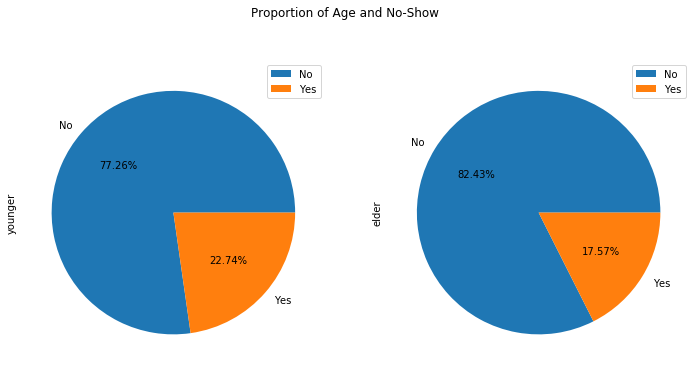

In [47]:
# 以圓餅圖呈現年紀小於平均值，其是否就診的比例，與年紀大於平均值，其是否就診的比例
age_proportions.plot(kind='pie', labels=['No','Yes'], autopct='%.2f%%', subplots=True, figsize=(12, 6), title = 'Proportion of Age and No-Show');

**結論**

由以上數據可發現，年紀較輕的人其不依約就診的比例高於年紀較大的人

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

**總結**

因數據內容為2015和2016兩年的數據，所以上述調查結果只適用於分析這兩年是否就診的情況。對於未來的預測，可能會因其他因子的改變，而影響年紀或性別等與是否就診的關係！


**附著** 項目過程中參考的網站

1. https://stackoverflow.com/questions/36539396/how-to-create-a-dataframe-while-preserving-order-of-the-columns
